# Project Title - change this

TODO - Write some introduction about your project here: describe the dataset, where you got it from, what you're trying to do with it, and which tools & techniques you're using. You can also mention about the course [Data Analysis with Python: Zero to Pandas](zerotopandas.com), and what you've learned from it.

## Downloading the Dataset

**TODO** - add some explanation here

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/mizomatic/usa-crime-data-20182019' 

In [4]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: akash125
Your Kaggle Key: ········


100%|██████████| 14.9k/14.9k [00:00<00:00, 4.83MB/s]

The dataset has been downloaded and extracted.

In [5]:
data_dir = './usa-crime-data-20182019'

In [6]:
import os
os.listdir(data_dir)

['Crime_Data_USA.csv']

Let us save and upload our work to Jovian before continuing.

In [7]:
project_name = "analyzing-us-crime-data"

In [8]:
!pip install jovian --upgrade -q

In [9]:
import jovian

<IPython.core.display.Javascript object>

In [10]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Uploading notebook to https://jovian.ml/a-malhotraakash/analyzing-us-crime-data


<IPython.core.display.Javascript object>

In [11]:
!pip install pandas 
!pip install matplotlib 
!pip install seaborn

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
US_Crime = pd.read_csv(data_dir + '/Crime_Data_USA.csv')

In [14]:
US_Crime

,State,City,Year,Population,Violent Crime,Murder,Rape,Robbery,Aggravated assault,Property Crime,Burglary,Larceny Theft,Motor Vehicle Theft,Arson
0,ALABAMA,HUNTSVILLE4,2018.0,196620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALABAMA,HUNTSVILLE4,2019.0,196620,872.0,12.0,79.0,159.0,622.0,3854.0,554.0,2804.0,496.0,NaN
2,ALABAMA,TUSCALOOSA,2018.0,101764,253.0,3.0,20.0,71.0,159.0,2092.0,414.0,1569.0,109.0,NaN
3,ALABAMA,TUSCALOOSA,2019.0,101764,311.0,4.0,18.0,92.0,197.0,2166.0,347.0,1672.0,147.0,NaN
4,ARIZONA,CHANDLER,2018.0,255986,287.0,1.0,74.0,62.0,150.0,2771.0,369.0,2241.0,161.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,WISCONSIN,GREEN BAY,2019.0,105281,242.0,2.0,35.0,27.0,178.0,812.0,109.0,640.0,63.0,3.0
548,WISCONSIN,MADISON,2018.0,258455,501.0,2.0,57.0,90.0,352.0,2922.0,416.0,2264.0,242.0,5.0
549,WISCONSIN,MADISON,2019.0,258455,434.0,0.0,49.0,97.0,288.0,2834.0,428.0,2134.0,272.0,5.0
550,WISCONSIN,MILWAUKEE,2018.0,595619,4190.0,53.0,284.0,1080.0,2773.0,8606.0,1967.0,4266.0,2373.0,88.0


In [15]:
US_Crime.shape

(552, 14)

In [16]:
US_Crime.isna().sum()

State                   0
City                    0
Year                    0
Population              0
Violent Crime          10
Murder                  1
Rape                   10
Robbery                 1
Aggravated assault      1
Property Crime          5
Burglary                3
Larceny Theft           3
Motor Vehicle Theft     1
Arson                  28
dtype: int64

In [17]:
states = len(US_Crime.State.unique())

In [18]:
states

43

SINCE, IN USA THERE ARE 50/52 STATES, BUT FROM THE OUTPUT OF ABOVE COMMAND IT CAN BE SEEN THAT SOME STATES ARE STILL THERE IN THE USA WHERE CRIME RATE MAYBE VERY LOW(almost negligible) OR CRIMES ARE NOT BEEN RECORDED.

In [19]:
US_Crime.drop(['Arson'], axis = 1, inplace = True)

In [20]:
print(US_Crime['State'].unique())

['ALABAMA' 'ARIZONA' 'ARKANSAS' 'CALIFORNIA' 'COLORADO' 'CONNECTICUT'
 'FLORIDA' 'GEORGIA' 'HAWAII' 'IDAHO' 'ILLINOIS' 'INDIANA' 'KANSAS'
 'KENTUCKY' 'LOUISIANA' 'MARYLAND' 'MASSACHUSETTS' 'MICHIGAN' 'MINNESOTA'
 'MISSISSIPPI' 'MISSOURI' 'MONTANA' 'NEBRASKA' 'NEVADA' 'NEW HAMPSHIRE'
 'NEW JERSEY' 'NEW MEXICO' 'NEW YORK' 'NORTH CAROLINA 5, 6, 8'
 'NORTH DAKOTA' 'OHIO' 'OKLAHOMA' 'OREGON' 'PENNSYLVANIA' 'RHODE ISLAND'
 'SOUTH CAROLINA' 'SOUTH DAKOTA' 'TENNESSEE' 'TEXAS' 'UTAH' 'VIRGINIA'
 'WASHINGTON' 'WISCONSIN']


In [21]:
US_Crime.drop(['City'], axis = 1, inplace = True)

In [22]:
US_Crime

,State,Year,Population,Violent Crime,Murder,Rape,Robbery,Aggravated assault,Property Crime,Burglary,Larceny Theft,Motor Vehicle Theft
0,ALABAMA,2018.0,196620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALABAMA,2019.0,196620,872.0,12.0,79.0,159.0,622.0,3854.0,554.0,2804.0,496.0
2,ALABAMA,2018.0,101764,253.0,3.0,20.0,71.0,159.0,2092.0,414.0,1569.0,109.0
3,ALABAMA,2019.0,101764,311.0,4.0,18.0,92.0,197.0,2166.0,347.0,1672.0,147.0
4,ARIZONA,2018.0,255986,287.0,1.0,74.0,62.0,150.0,2771.0,369.0,2241.0,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...
547,WISCONSIN,2019.0,105281,242.0,2.0,35.0,27.0,178.0,812.0,109.0,640.0,63.0
548,WISCONSIN,2018.0,258455,501.0,2.0,57.0,90.0,352.0,2922.0,416.0,2264.0,242.0
549,WISCONSIN,2019.0,258455,434.0,0.0,49.0,97.0,288.0,2834.0,428.0,2134.0,272.0
550,WISCONSIN,2018.0,595619,4190.0,53.0,284.0,1080.0,2773.0,8606.0,1967.0,4266.0,2373.0


In [23]:
US_Crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State                552 non-null    object 
 1   Year                 552 non-null    float64
 2   Population           552 non-null    int64  
 3   Violent Crime        542 non-null    float64
 4   Murder               551 non-null    float64
 5   Rape                 542 non-null    float64
 6   Robbery              551 non-null    float64
 7   Aggravated assault   551 non-null    float64
 8   Property Crime       547 non-null    float64
 9   Burglary             549 non-null    float64
 10  Larceny Theft        549 non-null    float64
 11  Motor Vehicle Theft  551 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 51.9+ KB


In [24]:
Total_rape_cases = US_Crime.Rape.sum()
Total_murder_cases = US_Crime.Murder.sum()
Total_robbery_cases = US_Crime.Robbery.sum()
Total_property_cases = US_Crime['Property Crime'].sum()
Total_violent_crimes = US_Crime['Aggravated assault'].sum()
Total_burglary_cases = US_Crime.Burglary.sum()
Total_Larceny_Theft = US_Crime['Larceny Theft'].sum()
Total_Motor_Vehicle_Theft = US_Crime['Motor Vehicle Theft'].sum()

In [25]:
Total_number_of_cases = Total_rape_cases + Total_murder_cases + Total_robbery_cases + Total_property_cases + Total_violent_crimes + Total_burglary_cases + Total_Larceny_Theft + Total_Motor_Vehicle_Theft
Total_number_of_cases

5451596.0

In [29]:
crime = US_Crime.head(30)

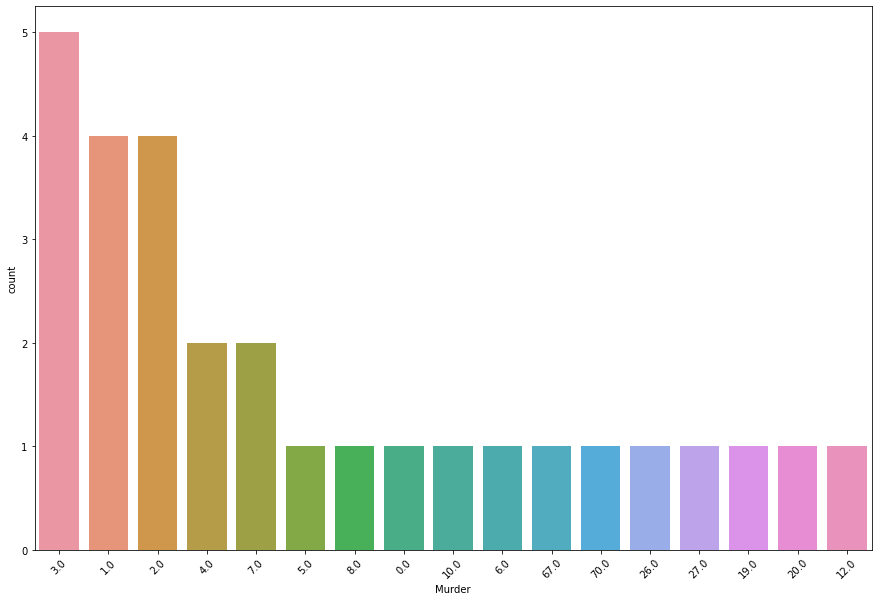

In [36]:
plt.figure(figsize=(15, 10));
sns.countplot(x="Murder", data=crime, order = crime['Murder'].value_counts().index);
plt.xticks(rotation=45);

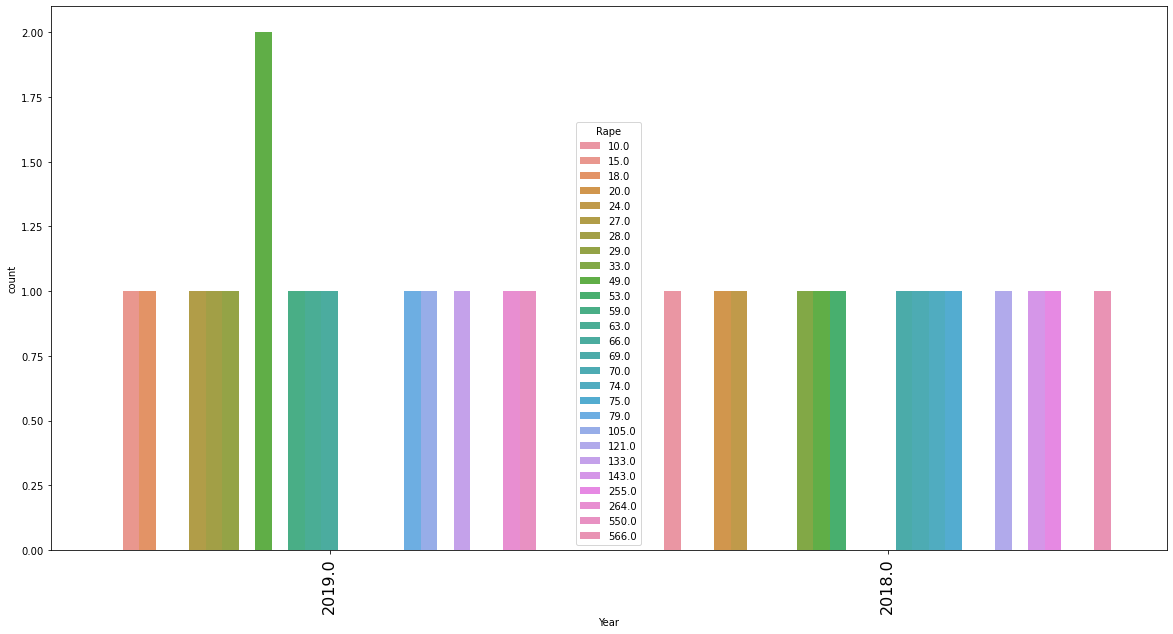

In [44]:
plt.figure(figsize=(20, 10));
sns.countplot(x="Year", data=crime, hue='Rape', order=crime.Year.value_counts().iloc[:5].index);
plt.xticks(size=16, rotation=90);

In [45]:
import jovian

In [47]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/a-malhotraakash/analyzing-us-crime-data


<IPython.core.display.Javascript object>

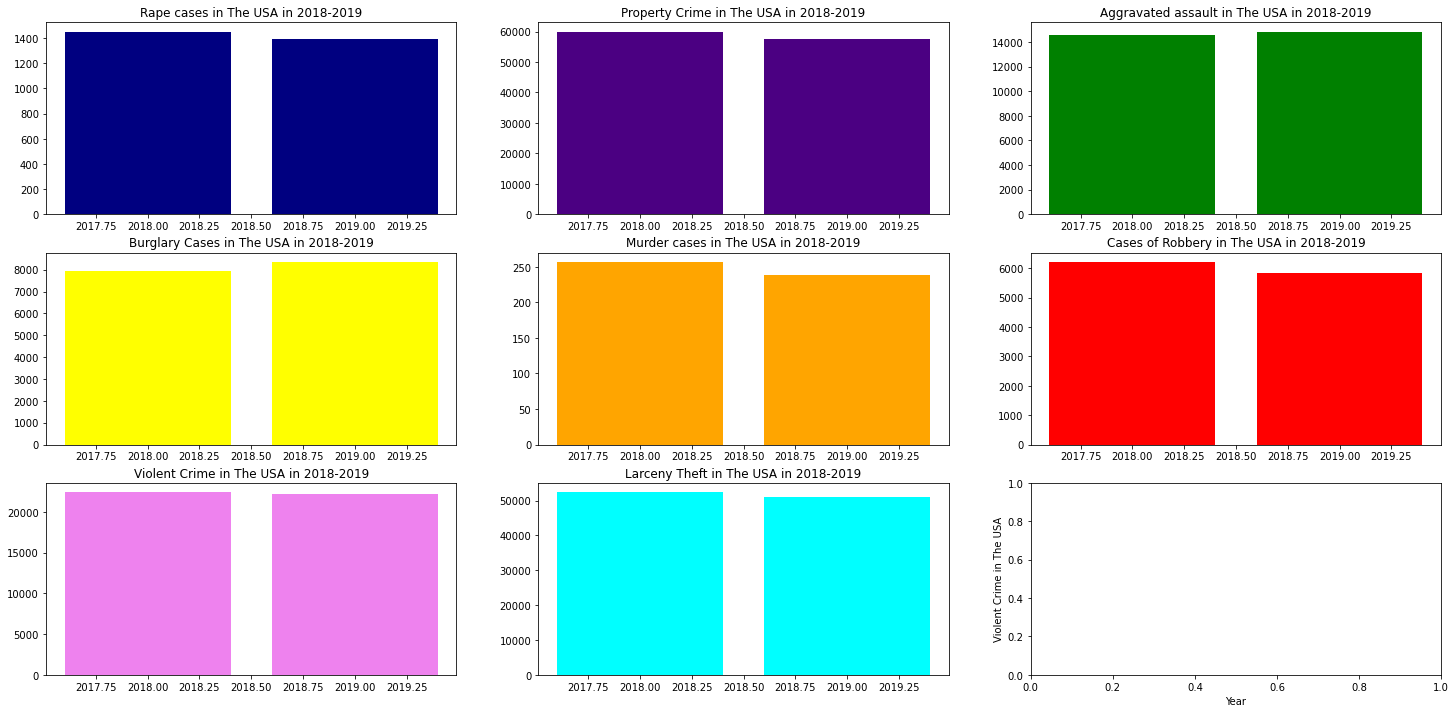

In [48]:
fig, axes = plt.subplots(3, 3, figsize=(25, 12));
axes[0,0].set_title("Rape cases in The USA in 2018-2019");
axes[0,0].bar(US_Crime.Year, US_Crime.Rape, color = 'navy');
plt.xlabel('Year'); #X-axis
plt.ylabel('Rape Cases in The USA'); #Y-axis

axes[1,1].set_title("Murder cases in The USA in 2018-2019");
axes[1,1].bar(US_Crime.Year, US_Crime.Murder, color = 'orange');
plt.xlabel('Year'); #X-axis
plt.ylabel('Cases of Murder inThe USA'); #Y-axis

axes[1,2].set_title("Cases of Robbery in The USA in 2018-2019");
axes[1,2].bar(US_Crime.Year, US_Crime.Robbery, color = 'red');
plt.xlabel('Year'); #X-axis
plt.ylabel('Cases ofImportation of girls in India'); #Y-axis

axes[0,1].set_title("Property Crime in The USA in 2018-2019");
axes[0,1].bar(US_Crime.Year, US_Crime['Property Crime'], color = 'indigo');
plt.xlabel('Year'); #X-axis
plt.ylabel('Property Crime in The USA'); #Y-axis

axes[0,2].set_title("Aggravated assault in The USA in 2018-2019");
axes[0,2].bar(US_Crime.Year, US_Crime['Aggravated assault'], color = 'green');
plt.xlabel('Year'); #X-axis
plt.ylabel('Aggravated assault in The USA'); #Y-axis

axes[1,0].set_title("Burglary Cases in The USA in 2018-2019");
axes[1,0].bar(US_Crime.Year, US_Crime.Burglary, color = 'yellow');
plt.xlabel('Year'); #X-axis
plt.ylabel('Burglary Cases in The USA'); #Y-axis

axes[2,1].set_title("Larceny Theft in The USA in 2018-2019");
axes[2,1].bar(US_Crime.Year, US_Crime['Larceny Theft'], color = 'cyan');
plt.xlabel('Year'); #X-axis
plt.ylabel('Larceny Theft in The USA'); #Y-axis

axes[2,0].set_title("Motor Vehicle Theft in The USA in 2018-2019");
axes[2,0].bar(US_Crime.Year, US_Crime['Motor Vehicle Theft'], color = 'black');
plt.xlabel('Year'); #X-axis
plt.ylabel('Motor Vehicle Theft in The USA'); #Y-axis

axes[2,0].set_title("Violent Crime in The USA in 2018-2019");
axes[2,0].bar(US_Crime.Year, US_Crime['Violent Crime'], color = 'violet');
plt.xlabel('Year'); #X-axis
plt.ylabel('Violent Crime in The USA'); #Y-axis

In [50]:
rape_case = crime.groupby(by=['Rape'])['State'].sum()
rape_case = rape_case.reset_index()
rape_case = rape_case.sort_values(by=['State'], ascending=False)

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

(array([  0.,  50., 100., 150., 200., 250.]),
 <a list of 6 Text major ticklabel objects>)

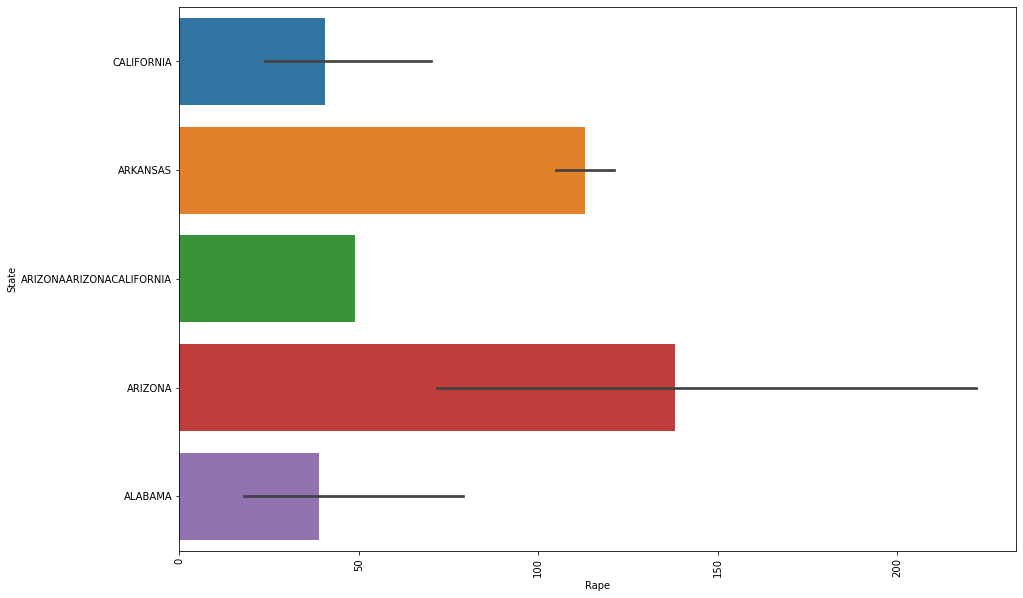

In [51]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Rape", y="State", data=rape_case)
plt.xticks(rotation=90)

In [57]:
count = crime.groupby('Population').count()

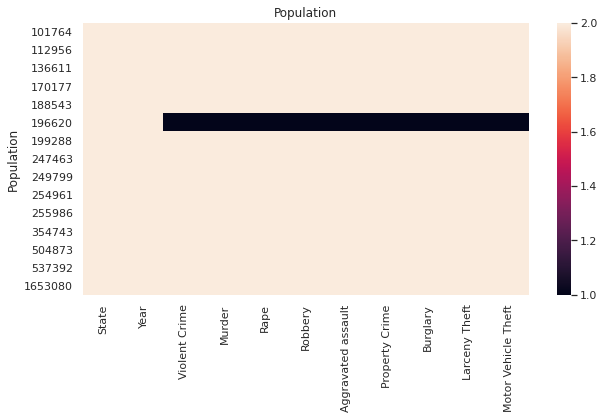

In [59]:
plt.figure(figsize=(10,5))
plt.title("Population")
sns.heatmap(count);

In [60]:
import jovian

In [ ]:
jovian.commit()

## References and Future Work

**TODO** - Write some explanation here: ideas for future projects using this dataset, and links to resources you found useful.

> Submission Instructions (delete this cell)
> 
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>
> (Optional) Write a blog post
> 
> - A blog post is a great way to present and showcase your work.  
> - Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
> - Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml


 

In [ ]:
import jovian

In [61]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/a-malhotraakash/analyzing-us-crime-data


<IPython.core.display.Javascript object>